<center>
<img src="https://camo.githubusercontent.com/ad20aaaa48264581c46aa126919dbb72060ebd98cffe015523549b4974843ae5/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f46556c79616e6b696e2f725f70726f626162696c6974792f6d61737465722f656e645f73656d696e6172732f73656d5f362f73747564656e745f746561636865725f646973742e706e67" height="200"> 

# Прикладаная статистика: домашнее задание 2
</center>

> скрррааа па па ка ка ка скидики па па энд э пу пу дррр бум скьа ду ду ку ку тун тун пум пум

$\qquad$ [БутcРэп](https://www.youtube.com/watch?v=eE4qxB2E8d4)


**ФИО:**

## Общая информация


__Дата выдачи:__ 23.04.2022

__Дедлайн:__ 23:59MSK 14.05.2022

## Формат сдачи

Сам ноутбук называйте в формате hw-01-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл надо будет, как обычно, сдать в anytask.

## Оформление

В этом домашнем задании мы будем проверять гипотезы. Во всех задачах подробно обосновывайте выбор критерия для проверки гипотезы и делайте выводы.

In [1]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

## [10 баллов] Задание 1 (рейтинги президентов) 

В таблице `presidents.csv` представлены рейтинги различных президентов США (интересно, почему не российских). Социальные опросы проводились раз в квартал. Опрашивалась случайная выборка граждан. У каждого спрашивалось одобряет ли он деятельность президента.

Ричард Никсон был президентом США с 20 января 1969 года по 9 августа 1974 года. 17 июня 1972 года произошёл Уотергейтский скандал. Давайте проанализируем, что при этом произошло с его рейтингом.

In [2]:
df = pd.read_csv('data/presidents.csv')
df.head()

,year,Qtr1,Qtr2,Qtr3,Qtr4
0,1945,NaN,87,82.0,75.0
1,1946,63.0,50,43.0,32.0
2,1947,35.0,60,54.0,55.0
3,1948,36.0,39,NaN,NaN
4,1949,69.0,57,57.0,51.0


Чтобы привести таблицу к удобному виду используйте функцию `pd.melt`. Вытащите из таблички рейтинг Никсона с 1 квартала 1969 года по 2 квартал 1972 года (включая его). Запишите эти данные в переменную `x`. Рейтинг с 3 квартала 1972 года по 2 квартал 1974 года поместите в переменную `y`. Пропуски в данных удалите из выборки.

In [45]:
melted = pd.melt(
    df, 
    id_vars=['year'], 
    value_vars=df.columns, 
    value_name='rating', 
    var_name='quarter'
).dropna()

x = melted.loc[(
    (melted['year'].between(1969, 1971)) | 
    ((melted['year']==1972)&(melted['quarter'] <= 'Qtr2'))
), 'rating'].values

y = melted.loc[(
    (melted['year'] == 1973) | 
    ((melted['year'] == 1972)&(melted['quarter'] > 'Qtr2')) |
    ((melted['year']==1974)&(melted['quarter'] <= 'Qtr2'))
), 'rating'].values

Правда ли, что после скандала средний рейтинг Никсона рухнул? Предполагайте, что рейтинг распределён нормально, а также, что дисперсия рейтинга не изменилась из-за скандала. Наблюдаемое значение статистики запишите в переменную `obs`, в переменную `pval` запишите $p$-значение.

In [47]:
x_mean = x.mean()
y_mean = y.mean()

In [48]:
x_mean, y_mean

(56.357142857142854, 38.666666666666664)

In [2]:
from statsmodels.stats.weightstats import ttest_ind, ztest

In [60]:
obs, pval, ddof = ttest_ind(
    x, 
    y, 
    alternative='larger', 
    usevar='pooled'
)

In [61]:
pval

0.0011087344846424454

In [62]:
# небольшая самопроверка
assert np.abs(obs - 3.5640741313229793) < 1e-5

**Почему вы выбрали именно этот критерий для проверки гипотезы? Какие выводы вы сделали?**

**Ответ:** 


Поскольку мы предполагаем, что случайная величина распределена нормально, и дисперсии выборок равны, то можем воспользоваться t критерием, основанном на распределениии Стьюдента с числом степеней свободы (m + n - 2). 
Как обычно, пусть $\lambda = 0.05$

$H_0: \overline{X} = \overline{Y};\newline H_1: \overline{X} > \overline{Y}$

Получаем p-value меньше, чем $\lambda$ и отвергаем нулевую гипотезу о том, что рейтинг не упал

Снова президентом Никсон станет в $3000$ году. 

![](https://vignette.wikia.nocookie.net/futurama/images/2/2f/Richard_M._Nixon%27s_head.jpg/revision/latest/scale-to-width-down/250?cb=20131123190522&path-prefix=ru)

## [10 баллов] Задание 2 (доктор сон)

Проводится эксперимент о пользе нового снотворного. Для его проведения используется группа из $10$ студентов. В первый день каждый из них ложится спать. На утро измеряется, сколько он проспал. Из результата вычитают $8$ (нормальное число часов сна). На второй день каждому дают таблетку. Утром снова измеряют, сколько человек проспал, и вычитают $8$. Результаты эксперимента записаны в табличку `sleep.csv`.

In [2]:
df = pd.read_csv('data/sleep.csv')
df.head()

,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5


Правда ли, что сон студентов до приёма снотворного не отличается от нормы (отклонение от 8 часов равно нулю). Проверьте эту гипотезу на $5\%$ уровне значимости, в переменную `pval1` запишите p-значение. 

In [19]:
x1 = df.loc[df['group'] == 1].sort_values('ID')['extra'].dropna().values

#### Проверим гипотезу о нормальности распределения

In [20]:
sts.kstest(x1, 'norm', args=(x1.mean(), x1.std(ddof=1)))

KstestResult(statistic=0.18885164347315186, pvalue=0.8679667029388624)

#### Гипотезу о нормальности отвергнуть не можем, значит можем провести t-test

In [21]:
tobs1, pval1 = sts.ttest_1samp(x1, 0)
pval1

0.2175977800684489

#### Не можем отвергнуть гипотезу о том, что студенты спят нормально до приема снотворного

Правда ли, что благодаря таблеткам студенты стали спать больше (односторонняя альтернатива)? Запишите в переменную `pval2` соотвествующее p-значение. 

In [26]:
x2 = df.loc[df['group'] == 2].sort_values('ID')['extra'].dropna().values
x_diff = x2 - x1

In [39]:
diff_mean = x_diff.mean()
diff_std = np.sqrt(np.sum((x_diff - diff_mean) ** 2) / (x_diff.size - 1))

In [51]:
tobs2 = diff_mean / (diff_std / np.sqrt(x_diff.size))
tobs2

4.062127683382037

In [50]:
pval2 = 1 - sts.t(df=x_diff.size - 1).cdf(tobs2)
pval2

0.0014164450986920984

In [60]:
# самопроверка
assert np.abs(tobs1 - 1.325710) < 1e-5
assert np.abs(tobs2 - 4.062127) < 1e-5

**Почему вы выбрали именно этот критерий для проверки гипотезы? Какие выводы вы сделали?**

**Ответ:** Поскольку наблюдений совсем мало, а значит асимтотический критерий не применим, то можно сделать предположение о нормальности данных для того, чтобы воспользоваться точной оценкой. Данные не противоречат гипотезе о нормальности, поэтому пользуемся t тестом для зависимых величин.$\newline$

$H_0: D = X_2 - X_1 = 0\newline
H_1: D > 0$
$p_{val} < \lambda$, значит отвергаем нулевую гипотезу, после приема снотворного студенты стали спать больше

## [30 баллов] Задание 3 (мудрость)

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её можно лайкнуть. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она будет лайкнута, повышается. Например, цитату 

> Можно простить человеку все, кроме отсутствия. (Экзюпери) 

мне не очень хотелось бы лайкать. А вот цитата 

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков) 

совершенно другое дело. 

В табличке `df_vk_wise` лежат данные о мудрых цитатах из [мудрого паблика.](https://vk.com/ooioioioioioo) В колонке `I` находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Срежем первые $50$ постов, так как под ними количество репостов и лайков ещё окончательно не выставлено, и будем работать с остатками. 

In [3]:
df = pd.read_csv('data/df_vk_wise.csv')[50:]
df.head()

,likes,reposts,text,I
50,549,25,"Я, говорит, люблю человечество, но дивлюсь на ...",True
51,607,22,"Нельзя любить то, что я люблю, да ещё так, как...",True
52,914,37,Если испытываешь по-настоящему глубокое чувств...,False
53,989,34,"— Я тебя люблю, — сказал я. \n— Это пройдет, —...",True
54,1229,32,"Он очаровательно рассказывает мне о том, как о...",False


Постройте гистограмму для числа лайков постов, содержащих личные местоимения и не содержащих. Как думаете, есть ли с распределением лайков какие-то проблемы?

<AxesSubplot:>

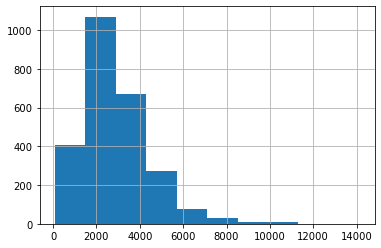

In [4]:
df.loc[df['I'] == True, 'likes'].hist()

<AxesSubplot:>

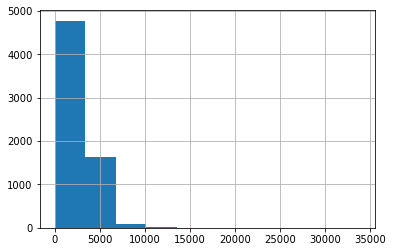

In [5]:
df.loc[df['I'] == False, 'likes'].hist()

Да, проблемы есть. Это выбросы. Хвосты на гистограммах оказываются очень длинными. Найдите медианы и средние для числа лайков. Сравните их между собой. 

In [6]:
print(f"median = {df['likes'].median()}")
print(f"mean = {df['likes'].mean()}")

median = 2524.0
mean = 2810.7557024793387


Проверьте гипотезу о равенстве среднего числа лайков. Используйте для этого $z$-тест, основанный на ЦПТ. Дисперсию расчитывайте по выборке, используя несмещённую оценку `(ddof=1)`. Запишите наблюдаемое значение статистики в переменную `z_obs`. 

In [9]:
x = df.loc[df['I'] == True, 'likes'].dropna().values
y = df.loc[df['I'] == False, 'likes'].dropna().values

alpha = 0.05
z_obs = (x.mean() - y.mean()) / np.sqrt((x.var(ddof=1) / x.size) + (y.var(ddof=1) / y.size))

Найдите критическое значение статистики. Сравните его с наблюдаемым. Рассчитайте p-value для ситуации с двусторонней альтернативой. Сделайте вывод о выдвинутой гипотезе. Критическое значение статистики запишите в переменную `z_crit`, а p-значение в переменную `pval`. 

In [10]:
z_crit_left = sts.norm(loc=0, scale=1).ppf(alpha / 2)
z_crit_right = sts.norm(loc=0, scale=1).ppf(1 - alpha / 2)
z_crit_left, z_crit_right

(-1.9599639845400545, 1.959963984540054)

In [11]:
sts.norm(loc=0, scale=1).cdf(-z_obs), 1 - sts.norm(loc=0, scale=1).cdf(z_obs)

(0.00385558930272144, 0.0038555893027214516)

In [12]:
z_crit_left = sts.norm(loc=0, scale=1).ppf(alpha / 2)
z_crit_right = sts.norm(loc=0, scale=1).ppf(1 - alpha / 2)

# критических значения два (двусторонний критерий), запишу в переменную тот, за который выпало наблюдаемое значение статистики
z_crit = z_crit_right
pval = (
    sts.norm(loc=0, scale=1).cdf(-z_obs) # слева
    + (1 - sts.norm(loc=0, scale=1).cdf(z_obs)) # справа
)

pval

0.007711178605442891

Можно заметить, что у распределения числа репостов длинные хвосты. В данных есть выбросы, которые завышают среднее значение. Если выбросы сильные, то ЦПТ может ломаться. Из-за этого имеет смысл в данном случае использовать другой критерий. Например, критерий Манна-Уитни.

Найдите наблюдаемое значение статистики Манна-Уитни. Сравните его с критическим. Рассчитайте p-value для ситуации с двусторонней альтернативой. Сделайте вывод о выдвинутой гипотезе. Отличается ли полученный вывод от вывода 
z-теста?

In [13]:
u_obs, pval = sts.mannwhitneyu(x, y)

In [14]:
u_obs

8026666.5

In [15]:
pval

0.005020337321443885

In [16]:
u_obs

8026666.5

In [17]:
pval

0.005020337321443885

Речь в задании идет о репостах, однако ранее мы работали с лайками, поскольку нужно сравнить два критерия, я проведу тест для лайков и репостов.

C помощью непараметрического критерия мы более уверенно отвергли нулевую гипотезу о несмещенном распределении лайков. Фил в чате написал, что нужно сразу пользоваться p-value из пакетов, реализующих критерий, поэтому не расчитываю критические зничения статистики.

In [18]:
x = df.loc[df['I'] == True, 'reposts'].dropna().values
y = df.loc[df['I'] == False, 'reposts'].dropna().values

In [19]:
u_obs, pval = sts.mannwhitneyu(x, y)
pval

0.0018641282983665923

Гипотезу о несмещенных распределениях репостов также уверенно отвергаем

Проверьте гипотезу о мудрости с помощью бутстрапа. Нулевую гипотезу сформулируйте в терминах медиан.

$H_0: med(X) - med(Y) = 0\newline
H_1: med(X) - med(Y) \neq 0$

Буду строить тест, как Фил показывал на паре, делая медианы выборок одинаковыми

In [52]:
x = df.loc[df['I'] == True, 'likes'].dropna().values
y = df.loc[df['I'] == False, 'likes'].dropna().values

z = np.median(np.concatenate((x, y)))
x_new = x - np.median(x) + z
y_new = y - np.median(y) + z

In [22]:
def get_bootstrap_samples(sample: np.array, n: int) -> np.array:
    return np.random.choice(sample, size=(n, sample.size), replace=True)

In [25]:
xs = get_bootstrap_samples(x_new, 10000)
ys = get_bootstrap_samples(y_new, 10000)

In [49]:
x_medians = np.median(xs, axis=1)
y_medians = np.median(ys, axis=1)

x_vars = np.var(xs, axis=1)
y_vars = np.var(ys, axis=1)

In [57]:
t_stats = (x_medians - y_medians) / np.sqrt(x_vars.mean() / x.size + y_vars.mean() / y.size)

In [85]:
t_crit = np.quantile(t_stats, 1 - 0.05)
t_obs = (np.median(x) - np.median(y)) / np.sqrt(x.var() / x.size + y.var() / y.size)

t_crit, t_obs

(1.87316879263085, 2.5629478897235303)

<AxesSubplot:xlabel='t_stat', ylabel='Count'>

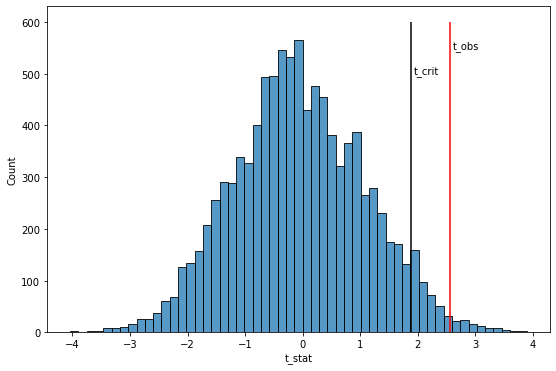

In [86]:
_, ax = plt.subplots(1, 1, figsize=(9, 6))

plt.vlines(t_crit, ymin=0, ymax=600, colors='black')
plt.annotate('t_crit', xy=(t_crit + 0.05, 500))

plt.vlines(t_obs, ymin=0, ymax=600, colors='red')
plt.annotate('t_obs', xy=(t_obs + 0.05, 550))

plt.xlabel('t_stat')

sns.histplot(t_stats)

Опять отвергаем гипотезу на заданном уровне значимости

## [10 баллов] Задание 4 (мыши и зеркало)

$16$ лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0168159104000061-gr1.gif)

В файле `mouses_mirror.txt` лежит информация о том, какую долю времени мышка проводила в клетке с зеркалом. 

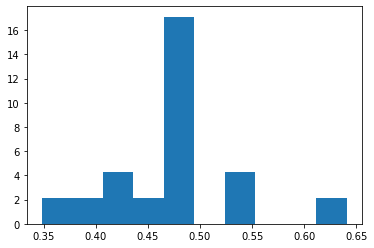

In [87]:
x = pd.read_csv('data/mouses_mirror.txt', header = None)[0].values
plt.hist(x, density=True);

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью критерия знаков. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия. Запишите в переменную `pvalue_1` получившееся в результате этого $p$-значение. 

$H_0: X = 0.5\newline
H_1: X \neq0.5$

Мы отказываемся от информации о величине отклонения наблюдений от 0.5, делаем новую выборку: $S = [X > 0.5]$. Она имеет биномиальное распределение, мы знаем ее плотность распределения, и можем оценить, насколько было бы вероятно получить наше или более экстримальное наблюдение из распределения $B(p=0.5, n=len(S))$

In [108]:
alpha = 0.05

In [95]:
binom = sts.binom(p=0.5, n=len(x))
xs = range(len(x) + 1)
probs = [binom.pmf(k) for k in xs]

In [112]:
stat_crit_left = binom.ppf(alpha / 2)
stat_crit_right = binom.ppf(1 - alpha / 2)
stat_crit_left, stat_crit_right

(4.0, 12.0)

In [138]:
signs = [int(time > 0.5) for time in x]

t_obs = sum(signs)
p_obs = binom.pmf(sum(signs))

pvalue_1 = sum([prob for prob in probs if prob <= p_obs])
pvalue_1

0.021270751953125104

<BarContainer object of 17 artists>

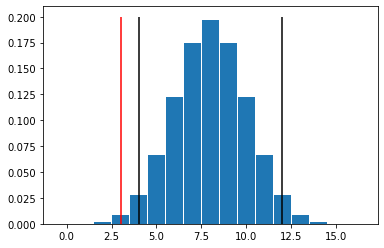

In [137]:
plt.vlines(stat_crit_left, 0, 0.2, color='black')
plt.vlines(stat_crit_right, 0, 0.2, color='black')

plt.vlines(t_obs, 0, 0.2, color='red')

plt.bar(xs, probs, width=0.95)

In [146]:
from statsmodels.stats.descriptivestats import sign_test

test = sign_test(x, mu0=0.5)
test

(-5.0, 0.021270751953125)

Сошлось с тем, что построил руками:)

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_2` получившееся в результате этого $p$-значение. 

In [142]:
_, pvalue_2 = sts.wilcoxon(x - 0.5)
pvalue_2

0.08793560714236243

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью асимптотического $z$-теста. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_3` получившееся в результате этого $p$-значение. 

In [154]:
from statsmodels.stats.weightstats import ztest,zconfint

z_stat, pvalue_3 = ztest(x, value=0.5)
pvalue_3

0.13460721078205806

In [150]:
# проверка того, что задание решено верно
assert pvalue_1 < 0.05
assert pvalue_2 > 0.05
assert pvalue_3 > 0.05

Объясните, почему `pvalue` от теста к тесту ведёт себя именно так. Подробнее про опыт с мышками читайте [в оригинальном исследовании.](https://www.sciencedirect.com/science/article/abs/pii/S0168159104000061)

__Ответ:__ В тестах знаков и Вилкоксона мы избавились от величин отклонения времени от 0.5, а для критерия Вилкоксона не факт, что предпосылка о симметрии распределения выполнена, видимо поэтому получились разные результаты. Но вряд ли тут можно пользоваться ЦПТ и асимптотикой, выборка всего 16 наблюдений. Поэтому мне больше нравится тут тест знаков, и это кажется логичным, поскольку время совсем не равномерно оказалось распределено относительно 0.5, видимо мышкам не особо нравится тусить в помещении с зеркалом

## [10 баллов] Задание 5 (ломаем тест Манна-Уитни)

Придумайте пример, на котором тест Манна-Уитни не будет работать. 

__Hint:__ Главная предпосылка теста заключается в том, что распределение не меняется, но у него происходит сдвиг. Воспользуйтесь этим. 

\begin{equation*}
    \begin{aligned}
    & H_0: F_X(x) = F_Y(y) \\
    & H_A: F_X(x) = F_Y(y + m), m \ne 0
    \end{aligned}
\end{equation*}


<center>
<img src='https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/sem12_more_ab/mw.png' align='center' width="300x">
</center>


In [209]:
binom_left = sts.binom(p=0.3, n=50)
binom_right = sts.binom(p=0.7, n=50)

binom_centered = sts.binom(p=0.5, n=50)

In [214]:
xs = range(51)

probs_centered = binom_centered.pmf(xs)

probs_bimodal = 0.5 * binom_left.pmf(xs) + 0.5 * binom_right.pmf(xs)

<BarContainer object of 51 artists>

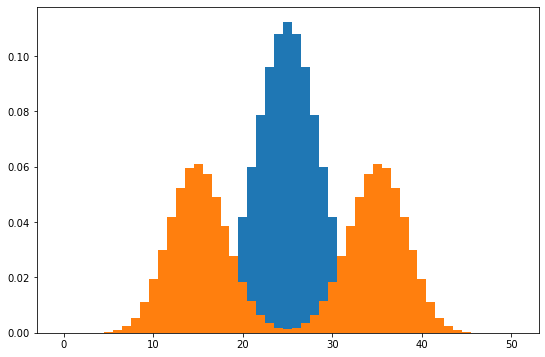

In [215]:
_, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.bar(xs, probs_centered, width=1)
plt.bar(xs, probs_bimodal, width=1)

Буду сэмплировать из таких распределений, видно, что они не смещены относительно друг друга, одно из них поляризованное

In [216]:
x = binom_centered.rvs(size=50)

In [223]:
y = [num for num in binom_left.rvs(size=50) if np.random.rand() > 0.5]
y += [num for num in binom_right.rvs(size=50 - len(y))]

(array([ 4., 10.,  7.,  2.,  1.,  1.,  1.,  6., 13.,  5.]),
 array([10., 13., 16., 19., 22., 25., 28., 31., 34., 37., 40.]),
 <BarContainer object of 10 artists>)

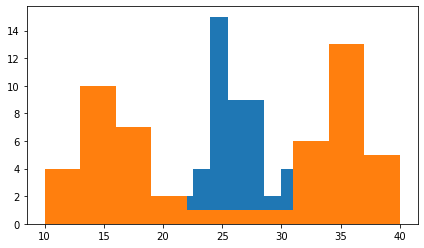

In [226]:
_, ax = plt.subplots(1, 1, figsize=(7, 4))
plt.hist(x)
plt.hist(y)

In [227]:
u_obs, pval = sts.mannwhitneyu(x, y)

In [228]:
pval

0.4341918366750995

Не можем отвергнуть нулевую гипотезу теста Манна-Уитни, но понятно, что распределения не похожи друг на друга

## [10 баллов] Задание 6 (проблема подглядывания)

Предположим, что мы отошли от классической схемы проведения АБ тестов и решили подводить итоги на уровне значимости 5% каждый день. Мы держим тест две недели. Если хотябы в один из дней p-value оказывается ниже $0.05,$ мы останавливаем тест и делаем выводы, что гипотеза не отвергается.

Так делать нельзя. Это называется проблемой подглядывания. В случае такой процедуры уровень значимости выходит из-под контроля. Давайте убедимся в этом с помощью симуляций. 

- Запланируйте АБ-тест для долей таким образом, чтобы ошибка 1 и 2 рода были равны 5%. В качестве MDE возьмите любое значение.
- Сгенерируйте нужное количество наблюдений. Разбейте его на 14 частей (тест идет 2 недели)
- Проверяйте гипотезу каждый день и останавливайтесь, если она не отвергается
- Какими оказались ошибки 1 и 2 рода в реальности?

Симуляции надо провести отдельно для верности нулевой гипотезы и отдельно для верности альтернативной гипотезы.

In [577]:
def find_n(p0, pa, alpha=0.05, beta=0.05):
    za = sts.norm().ppf(1 - alpha)
    zb = sts.norm().ppf(1 - beta)
    sn = (np.sqrt(p0*(1 - p0))* za + np.sqrt(pa*(1 - pa))* zb)/(pa - p0)
    return sn**2

In [578]:
n = int(find_n(0.5, 0.6, 0.05, 0.05)) + 1
n

266

In [430]:
obs_per_day = n // 14

In [548]:
def run_experiment(p=0.5, stop_early=False):
    x = sts.bernoulli(p=p).rvs(n)
    daily_x = []
    start = 0
    end = obs_per_day
    for _ in range(14):
        daily_x.append(x[start: end])
        start = end
        end += obs_per_day

    x_cum = np.array([])        
    for obs in daily_x:
        x_cum = np.concatenate((x_cum, obs)) if x_cum.size else obs
        _, pval = ztest(x_cum, value=0.5)
        if stop_early:
            if pval < 0.05:
                return pval
    return pval

In [571]:
def run_n_experiments(stop_early=False, n=100):
    np.random.seed(42)
    results_x = []
    results_y = []
    for _ in range(n):
        pval = run_experiment(p=0.5, stop_early=stop_early)
        results_x.append(pval)
        
    for _ in range(n):
        pval = run_experiment(p=0.6, stop_early=stop_early)
        results_y.append(pval)

        
    results_x = np.array(results_x)
    results_y = np.array(results_y)
    
    alpha = results_x[results_x < 0.05].size / n
    beta = results_y[results_y >= 0.05].size / n
    return alpha, beta

In [575]:
res_not_stop = run_n_experiments(n=1000)
print(f'type 1 error rate = {res_not_stop[0]}\ntype 2 error rate = {res_not_stop[1]}')

type 1 error rate = 0.065
type 2 error rate = 0.083


In [576]:
res_stop = run_n_experiments(n=1000, stop_early=True)
print(f'type 1 error rate = {res_stop[0]}\ntype 2 error rate = {res_stop[1]}')

type 1 error rate = 0.238
type 2 error rate = 0.048


С ошибкой первого рода все отлично

С ошибкой второго рода что-то пошло не так, она больше 5%, когда мы не подглядываем, и около 5%, когда подглядываем, наверное проблема в необходимом числе наблюдений

## [20 баллов] Задание 7 (онлифанс) 

Эта задача на то, что ты выигрываешь или проигрываешь, если отказываешься от АБ-тестов и просто принимаешь решение об изенениях по среднему. Задание довольно творческое, так как способ симуляции вам предстоит придумать самостоятельно.

У Аделины и Беллы есть аккаунты на онлифанс с конверсией $p=0.2\%$. Они меняют вёрстки и смотрят, как дела с деньгами. Белла нанаяла аналитика и принимает решения об изменениях по $p-value < 0.05,$ а Аделина просто смотрит на среднее и катит по нему. Например, если на старом дизайне из тысячи посетителей только $299$ оставило копеечку, а на новом — $300$, берём новый. Если наоборот — оставляем старый.

Пусть у каждой было $100$ правочек. Правочки одинаковые для обеих девушек. На них работает один и тот же фронтендер. Будем считать, что правочки независимы друг от друга. То есть, в какой бы момент мы не выкатили правочку, у нас всегда от неё будет одинаковое воздействие на конверсию. У каждой девушки было $100$ правочек. Кто после сотни правочек вырвется вперёд по конверсии? 

Буду делать так: у меня есть исходные конверсии девушек, создам массив длины 100 из случайных новых конверсий после выкатки одних и тех же изменений. Далее буду бежать по этим конверсиям и для обеих девушек проводить свой тест: сэмплировать из распределения бернулли по 1000 наблюдений для старого и нового дизайна и принимать решение о выкатке дизайна по правилу каждой девушки. В конце посмотрю, чья же конверсия оказалась лучше

In [456]:
n_users_per_group = 1000
adel_p = 0.002
bella_p = 0.002

design_ps = np.random.uniform(low=0.0001, high=0.05, size=100)

In [492]:
for new_design_p in design_ps:
    adel_current_pays = sts.binom(p=adel_p, n=1000).rvs()
    bella_current_pays = sts.bernoulli(p=bella_p).rvs(size=1000)
    
    adel_new_pays = sts.binom(p=new_design_p, n=1000).rvs()
    bella_new_pays = sts.bernoulli(p=new_design_p).rvs(size=1000)
    
    if adel_new_pays > adel_current_pays:
        adel_p = new_design_p
        
    _, pval = ztest(bella_new_pays, bella_current_pays, alternative='larger')
    if pval < 0.05:
        bella_p = new_design_p

In [499]:
print(
    (f'Bella conversion = {bella_p}\nAdel conversion = {adel_p}\n'
     'Bella wins using super clever statistical approach C:')
)

Bella conversion = 0.047826307372881474
Adel conversion = 0.044417140836397695
Bella wins using super clever statistical approach C:


Итог: разница хоть и небольшая, но все равно Белле приятно. Запускал симуляцию несколько раз, она всегда побеждает